In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Metrics.xlsx')

# Individual graphs

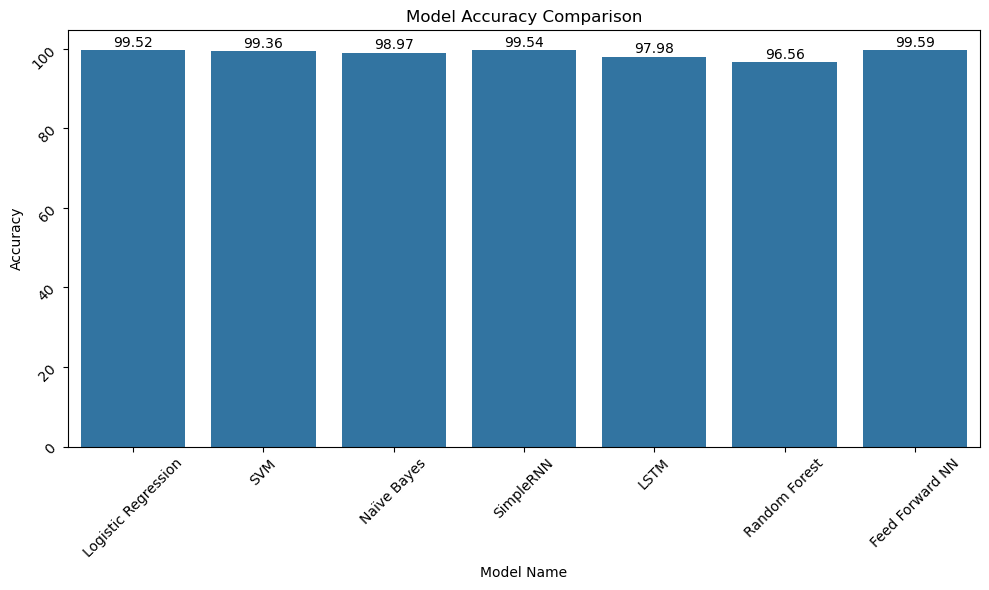

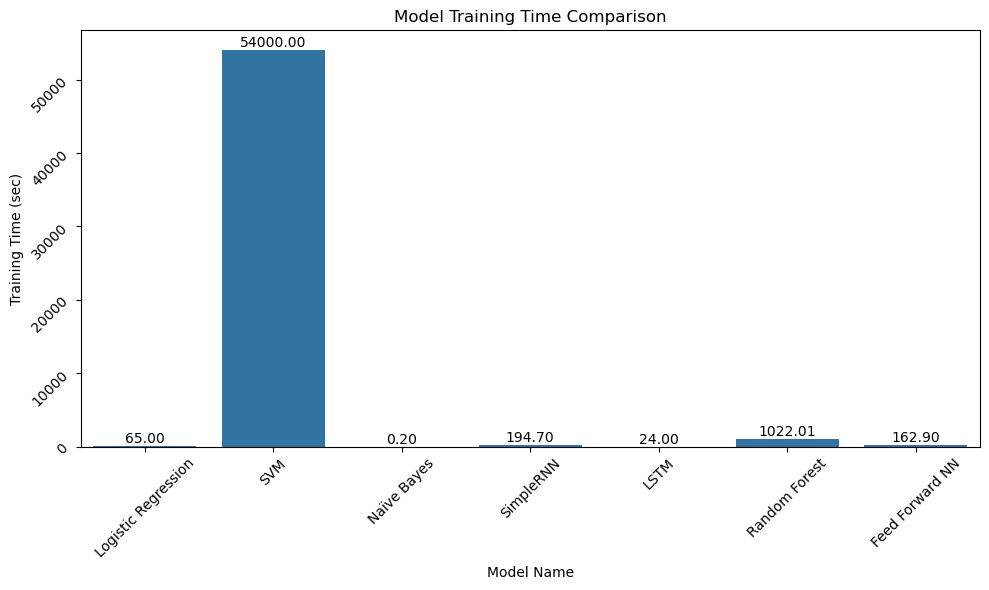

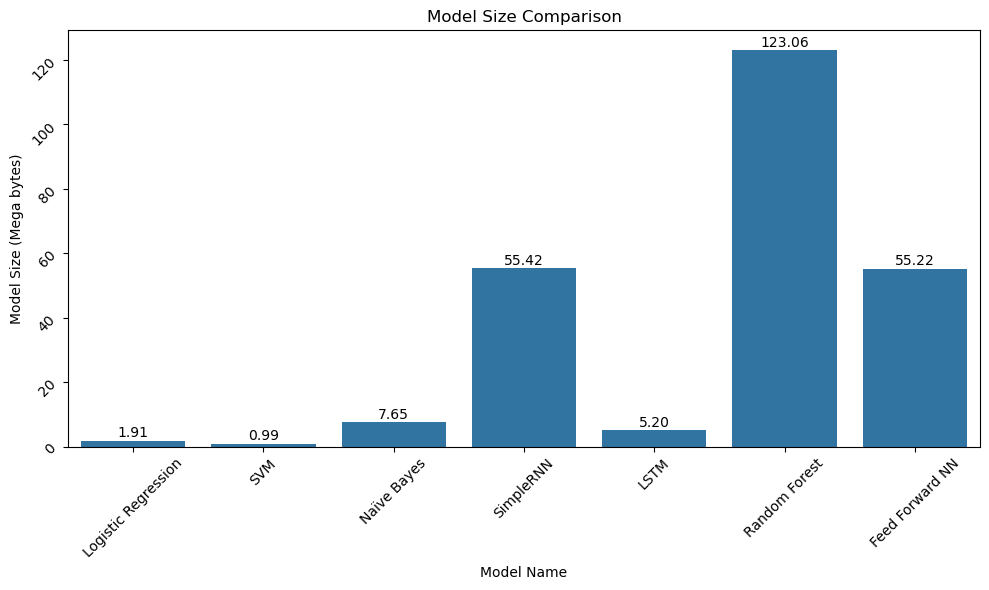

In [4]:
# Sample data (replace with your actual data)
data = {
    'Model Name': ['Logistic Regression', 'SVM', 'Naïve Bayes', 'SimpleRNN', 'LSTM', 'Random Forest', 'Feed Forward NN'],
    'Accuracy': [99.52, 99.36, 98.97, 99.54, 97.98, 96.56, 99.59],
    'Training Time (sec)': [65, 54000, 0.2, 194.7, 24, 1022.01, 162.9],
    'Model Size (Mega bytes)': [1.914319, 0.985069, 7.654996, 55.423816, 5.197488, 123.060035, 55.220720],
    'F1 Score': [0.99, 0.99, 0.98, None, None, 0.97, None]
}

df = pd.DataFrame(data)

def create_bar_graph(x_axis, y_axis, title):
  """
  Creates a bar graph using seaborn and prints values above the bars.
  """
  fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size as needed
  sns.barplot(x=x_axis, y=y_axis, data=df, ax=ax)

  # Get bar heights using get_height method
  bars = ax.containers[0]
  y_vals = [bar.get_height() for bar in bars]

  # Print values above the bars with some offset
  for bar, y_val in zip(bars, y_vals):
    ax.text(bar.get_x() + bar.get_width() / 2, y_val + 0.1, f"{y_val:.2f}", ha='center', va='bottom')

  ax.set_title(title)
  ax.set_xlabel(x_axis)
  ax.set_ylabel(y_axis)
  ax.tick_params(rotation=45)  # Rotate x-axis labels for better readability
  plt.tight_layout()
  plt.show()

# Create the 4 bar graphs
create_bar_graph('Model Name', 'Accuracy', 'Model Accuracy Comparison')
create_bar_graph('Model Name', 'Training Time (sec)', 'Model Training Time Comparison')
create_bar_graph('Model Name', 'Model Size (Mega bytes)', 'Model Size Comparison')


# Comparision Graphs

In [7]:
df = pd.read_excel('Metrics.xlsx')

In [10]:
df['Normalized Accuracy'] = df['Accuracy'] / 100  # Normalize accuracy to 0-1 by assuming it's percentage
df['Normalized Training Time'] = (df['Training Time in sec'] - df['Training Time in sec'].min()) / (df['Training Time in sec'].max() - df['Training Time in sec'].min())
df['Normalized Model Size'] = (df['Model size in Mega Bytes'] - df['Model size in Mega Bytes'].min()) / (df['Model size in Mega Bytes'].max() - df['Model size in Mega Bytes'].min())

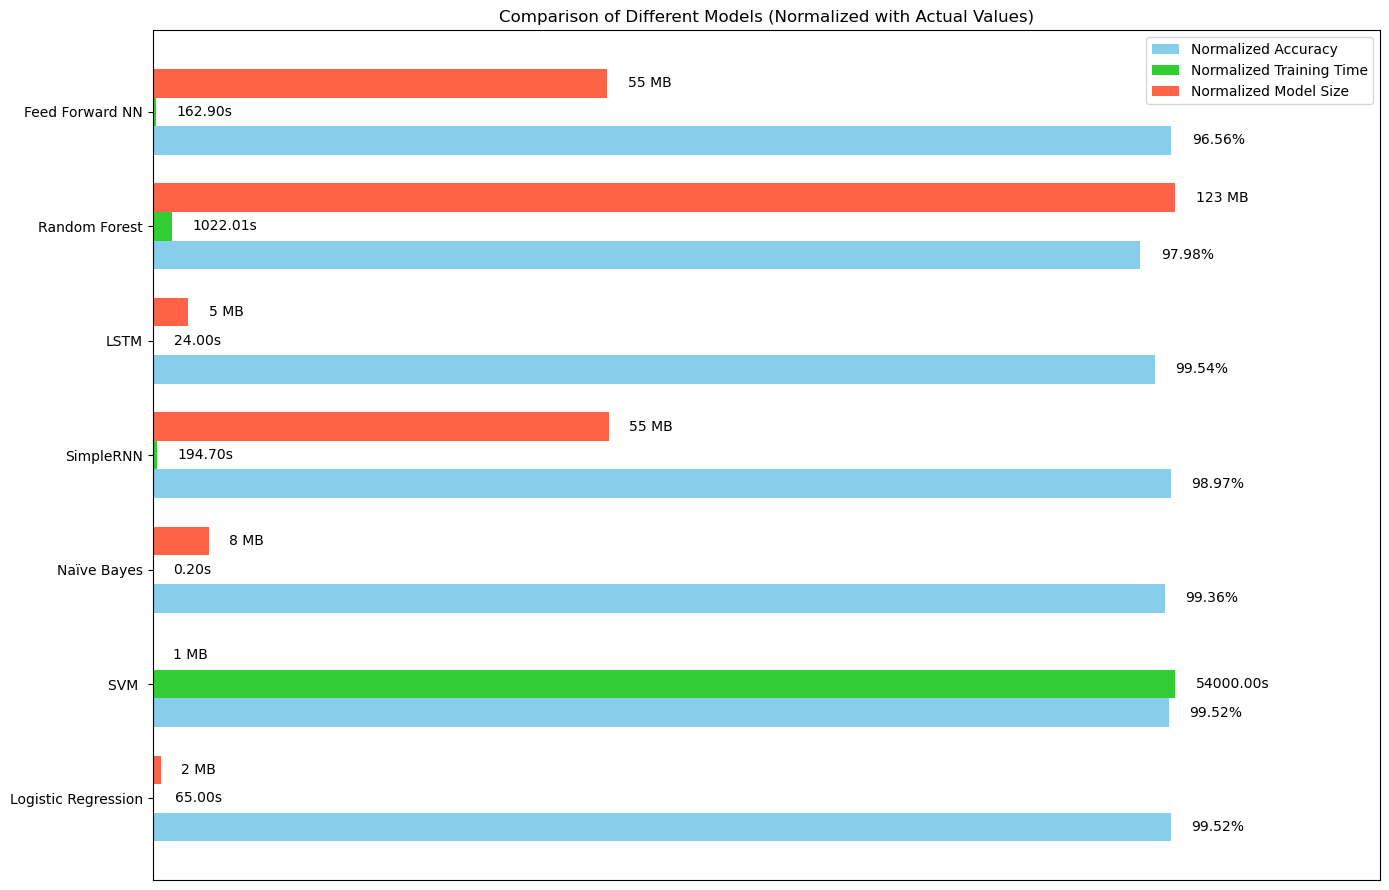

In [11]:

fig, ax = plt.subplots(figsize=(14, 9))
bar_positions = np.arange(len(df['Model name']))  
bar_width = 0.25


colors = ['skyblue', 'limegreen', 'tomato']
# colors = ['#4285F4', '#34A373', '#FBBD23']

for idx, (metric, actual_value) in enumerate([
    ('Normalized Accuracy', 'Accuracy'),
    ('Normalized Training Time', 'Training Time in sec'),
    ('Normalized Model Size', 'Model size in Mega Bytes')
]):
    bars = ax.barh(bar_positions + (idx - 1) * bar_width, df[metric], bar_width, color=colors[idx], label=f'{metric}')
    for bar in bars:
        if actual_value == 'Accuracy':
            value = f"{df[actual_value][int(bar.get_y() + bar.get_height() / 2)]:.2f}%"
        elif actual_value == 'Training Time in sec':
            value = f"{df[actual_value][int(bar.get_y() + bar.get_height() / 2)]:.2f}s"
        else:
            value = f"{df[actual_value][int(bar.get_y() + bar.get_height() / 2)]:,.0f} MB"

        text_x_position = bar.get_width() + 0.02
        ax.text(text_x_position, bar.get_y() + bar.get_height() / 2, value, va='center', ha='left', color='black', fontsize=10)

ax.set_yticks(bar_positions)
ax.set_yticklabels(df['Model name'])

ax.set_xlabel('Metrics (Normalized)')
ax.set_title('Comparison of Different Models (Normalized with Actual Values)')

ax.legend(loc='best')

ax.xaxis.set_visible(False)
ax.grid(False)

ax.set_xlim(0, 1.2) 

plt.tight_layout()
plt.show()
